In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv('telecom_churn_data.csv')

In [4]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
df.shape

(99999, 226)

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

## Data Cleaning

In [7]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [8]:
# function to sort missing percentages
def sortMissing(data, size):
    missing_df = round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)
    print(missing_df.head(size))

In [9]:
# get the percentage of missing values
sortMissing(df, 50)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [10]:
# dropping all columns having high percentages of missing values >70%
for column in df:
    col = df[column]
    if col.isnull().sum() * 100 / len(df) > 70.0:
        df.drop([column], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [12]:
sortMissing(df, 10)

loc_ic_t2m_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2f_mou_9    7.75
std_ic_t2t_mou_9    7.75
roam_og_mou_9       7.75
loc_ic_mou_9        7.75
loc_og_t2t_mou_9    7.75
loc_ic_t2f_mou_9    7.75
roam_ic_mou_9       7.75
ic_others_9         7.75
dtype: float64


### Dropping columns having single value

In [13]:
df.columns[df.nunique() <= 1].shape

(16,)

In [14]:
for column in df.columns[df.nunique() <= 1]:
    df.drop([column], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(4)
memory usage: 129.7+ MB


### Filter High Value customers

In [16]:
avg_rech_amt = (df.total_rech_amt_6 + df.total_rech_amt_7) / 2
df['avg_rech_amt'] = avg_rech_amt
df['avg_rech_amt'].quantile(0.7)

368.5

In [17]:
df_high_val = df[df['avg_rech_amt'] >= df['avg_rech_amt'].quantile(0.7)]
df_high_val.reset_index(inplace=True, drop=True)

In [18]:
df_high_val.shape

(30011, 171)

In [19]:
df_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
1,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
2,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
3,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
4,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


### Derive Churn

In [20]:
df_high_val.filter(regex=("._9")).columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9',
       'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9'],
      dtype='object')

In [21]:
df_high_val.total_og_mou_9.value_counts()

0.00       3249
0.21         20
1.01          7
0.61          7
5.93          6
           ... 
345.84        1
97.94         1
1391.18       1
248.33        1
1281.78       1
Name: total_og_mou_9, Length: 22615, dtype: int64

In [22]:
# total_og_mou_9, total_ic_mou_9, monthly_2g_9, monthly_3g_9
df_high_val['churn'] = ((df_high_val['total_og_mou_9'] < 1.0) &  (df_high_val['total_ic_mou_9'] < 1.0) & (df_high_val['monthly_2g_9'] < 1.0) & (df_high_val['monthly_3g_9'] < 1.0)).astype(int)
df_high_val['churn'].value_counts()

0    27302
1     2709
Name: churn, dtype: int64

In [23]:
df_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
1,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
2,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
3,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
4,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [24]:
### Checking the Churn Rate
churn = (sum(df_high_val['churn'])/len(df_high_val['churn'].index))*100
churn

9.02669021358835

In [25]:
df_high_val[['total_og_mou_9', 'total_ic_mou_9', 'monthly_2g_9', 'monthly_3g_9']].head()

,total_og_mou_9,total_ic_mou_9,monthly_2g_9,monthly_3g_9
0,0.00,0.00,0,0
1,142.18,34.91,0,0
2,446.09,631.86,0,0
3,255.74,334.56,0,0
4,631.08,87.13,0,0


### Drop all columns for Month 9

In [26]:
df_high_val.drop(df_high_val.filter(regex=("._9")).columns, inplace=True, axis=1)

In [27]:
df_high_val.shape

(30011, 131)

In [28]:
df_high_val.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 131 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        30011 non-null  int64  
 1   arpu_6               30011 non-null  float64
 2   arpu_7               30011 non-null  float64
 3   arpu_8               30011 non-null  float64
 4   onnet_mou_6          29695 non-null  float64
 5   onnet_mou_7          29708 non-null  float64
 6   onnet_mou_8          29073 non-null  float64
 7   offnet_mou_6         29695 non-null  float64
 8   offnet_mou_7         29708 non-null  float64
 9   offnet_mou_8         29073 non-null  float64
 10  roam_ic_mou_6        29695 non-null  float64
 11  roam_ic_mou_7        29708 non-null  float64
 12  roam_ic_mou_8        29073 non-null  float64
 13  roam_og_mou_6        29695 non-null  float64
 14  roam_og_mou_7        29708 non-null  float64
 15  roam_og_mou_8        29073 non-null

In [29]:
df_high_val.shape

(30011, 131)

In [30]:
# removing mobile number
df_high_val.drop(['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], inplace=True, axis=1)

In [31]:
# let's check the distribution of churn column
sortMissing(df_high_val, 50)

isd_og_mou_8        3.13
loc_ic_t2f_mou_8    3.13
spl_ic_mou_8        3.13
ic_others_8         3.13
std_og_t2m_mou_8    3.13
std_og_t2f_mou_8    3.13
std_og_t2t_mou_8    3.13
std_ic_mou_8        3.13
loc_og_mou_8        3.13
std_ic_t2f_mou_8    3.13
loc_og_t2c_mou_8    3.13
std_ic_t2m_mou_8    3.13
loc_og_t2f_mou_8    3.13
std_ic_t2t_mou_8    3.13
loc_og_t2m_mou_8    3.13
loc_og_t2t_mou_8    3.13
loc_ic_mou_8        3.13
offnet_mou_8        3.13
loc_ic_t2t_mou_8    3.13
spl_og_mou_8        3.13
og_others_8         3.13
onnet_mou_8         3.13
std_og_mou_8        3.13
roam_og_mou_8       3.13
isd_ic_mou_8        3.13
roam_ic_mou_8       3.13
loc_ic_t2m_mou_8    3.13
std_ic_t2m_mou_6    1.05
loc_ic_t2t_mou_6    1.05
std_ic_t2f_mou_6    1.05
loc_ic_t2m_mou_6    1.05
std_ic_t2t_mou_6    1.05
std_ic_mou_6        1.05
isd_og_mou_6        1.05
isd_ic_mou_6        1.05
std_og_t2f_mou_6    1.05
og_others_6         1.05
std_og_mou_6        1.05
spl_ic_mou_6        1.05
spl_og_mou_6        1.05


In [32]:
# Imputing missing values with KNN imputer
imputer = KNNImputer(n_neighbors=2)

In [33]:
df_high_val_imputed = pd.DataFrame(imputer.fit_transform(df_high_val),columns = df_high_val.columns)

In [34]:
df_high_val_imputed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0,0.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0,0.0
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0,0.0
4,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0,0.0


In [35]:
sortMissing(df_high_val_imputed, 10)

churn               0.0
spl_og_mou_7        0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
dtype: float64


## Data Preparation

In [36]:
df_high_val_imputed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 127 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [37]:
# Finding outliers
df_high_val_imputed.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.570022,304.701251,268.467774,418.892374,424.709081,376.694954,17.706985,...,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.090267
std,442.722413,462.897814,492.259586,460.614696,481.593939,466.180291,469.956346,485.984268,476.437782,80.065676,...,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.286569
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000
25%,364.161000,365.004500,289.609500,41.950000,41.480000,28.670000,138.430000,136.360000,98.285000,0.000000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000
50%,495.682000,493.561000,452.091000,126.060000,125.730000,100.360000,282.560000,282.330000,241.580000,0.000000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000
75%,703.922000,700.788000,671.150000,353.380000,359.925000,298.140000,523.295000,532.775000,482.735000,0.000000,...,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000
90%,994.099000,995.557000,985.202000,795.340000,824.380000,723.610000,916.030000,935.690000,853.790000,33.390000,...,0.000000,0.000000,0.000000,2846.000000,438.970000,454.830000,394.500000,0.000000,1118.000000,0.000000
95%,1240.793500,1261.421500,1258.555500,1154.405000,1208.175000,1115.660000,1271.470000,1286.285000,1188.460000,95.565000,...,1.000000,1.000000,1.000000,3179.000000,818.750000,845.315000,761.740000,18.635000,1406.000000,1.000000
99%,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,2188.504000,2326.290000,2410.104000,2211.642000,350.374000,...,3.000000,3.000000,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,173.662000,2216.300000,1.000000


In [38]:
# List of columns with outliers
out_list = []
for col in df_high_val_imputed:
    IQR = df_high_val_imputed[col].quantile(0.75) - df_high_val_imputed[col].quantile(0.5)
    if df_high_val_imputed[col].max()  >  df_high_val_imputed[col].quantile(0.75) + 1.5*IQR:
        out_list.append(col)
out_list

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

## Modelling

In [39]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_high_val_imputed.drop(['churn'],axis=1)

# Putting response variable to y
y = df_high_val_imputed['churn']

**Feature Standardization**

In [40]:
normalized_X = (X-X.mean())/X.std()

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, stratify=y, train_size=0.7,test_size=0.3,random_state=100)

### Prediction using PCA

In [42]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [43]:
pca = PCA(0.9)

In [44]:
df_train_pca = pca.fit_transform(X_train)

In [45]:
df_train_pca.shape

(21007, 51)

In [46]:
pca.components_

array([[ 0.17239538,  0.19334366,  0.19309593, ...,  0.04279805,
         0.02414144,  0.19990799],
       [ 0.10337755,  0.13055398,  0.1125503 , ..., -0.0550364 ,
        -0.01305077,  0.12841284],
       [ 0.13591175,  0.15522281,  0.14198261, ...,  0.16552445,
         0.05371914,  0.1614639 ],
       ...,
       [ 0.01376578,  0.00868891,  0.03052416, ...,  0.22173834,
        -0.05357231,  0.00290679],
       [ 0.02349623, -0.0628219 ,  0.08108614, ..., -0.02680103,
        -0.09036594, -0.01462256],
       [ 0.01928314,  0.02725527,  0.00289483, ...,  0.00405342,
        -0.0304203 ,  0.02394918]])

In [47]:
pca.explained_variance_ratio_

array([0.09935914, 0.08599588, 0.06082667, 0.04622431, 0.0388145 ,
       0.03548485, 0.03419657, 0.02698564, 0.02682936, 0.02528813,
       0.02438988, 0.02346342, 0.0221981 , 0.02182124, 0.02059907,
       0.01854065, 0.01799106, 0.01622217, 0.01450871, 0.01355473,
       0.01324722, 0.0128263 , 0.01171314, 0.0110843 , 0.01062756,
       0.00991381, 0.00954316, 0.0091771 , 0.00855625, 0.00821418,
       0.00813792, 0.0076926 , 0.00746489, 0.00725879, 0.00717252,
       0.00679253, 0.00661354, 0.00646007, 0.00619653, 0.00607072,
       0.00589991, 0.00567913, 0.00564531, 0.00547843, 0.00517971,
       0.00486636, 0.00481998, 0.00465068, 0.00429689, 0.0040401 ,
       0.00398166])

In [48]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

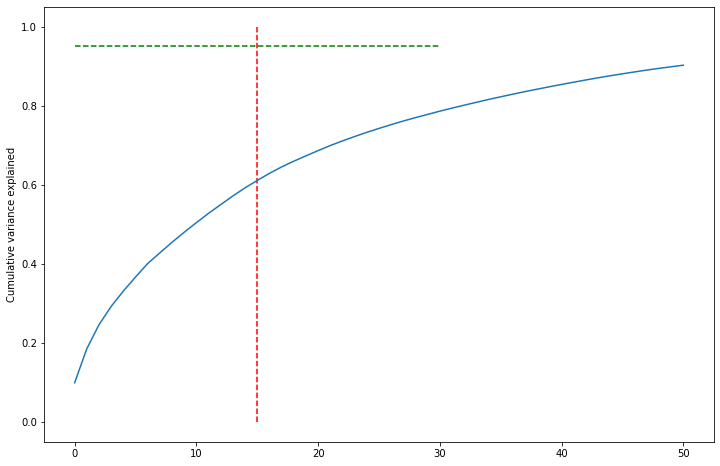

In [49]:
# Scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [50]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [51]:
learner_pca = LogisticRegression()

In [52]:
model_pca = learner_pca.fit(df_train_pca, y_train)

**Making Predictions**

In [53]:
df_test_pca = pca.transform(X_test)

In [54]:
df_test_pca.shape

(9004, 51)

In [55]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_pred_1 = pd.DataFrame(pred_probs_test)
y_pred_1.head()

,0
0,0.000819
1,0.066795
2,0.025579
3,0.038265
4,0.134676


In [56]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
23530,0.0
4825,0.0
14228,0.0
21259,0.0
23625,0.0


In [57]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,23530,0.0,0.000819
1,4825,0.0,0.066795
2,14228,0.0,0.025579
3,21259,0.0,0.038265
4,23625,0.0,0.134676


In [58]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,23530,0.0,0.000819,0
1,4825,0.0,0.066795,0
2,14228,0.0,0.025579,0
3,21259,0.0,0.038265,0
4,23625,0.0,0.134676,0


**Model Evaluation**

In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8083,  108],
       [ 610,  203]], dtype=int64)

In [60]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.920257663260773

In [61]:
metrics.precision_score(y_pred_final.churn, y_pred_final.predicted)

0.6527331189710611

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

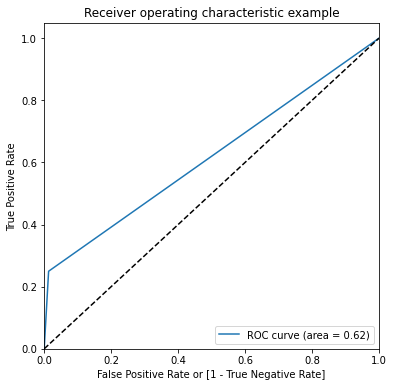

(array([0.       , 0.0131852, 1.       ]),
 array([0.       , 0.2496925, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [63]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [64]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

### Feature Selection

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [66]:
import statsmodels.api as sm

In [67]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20881
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3972.0
Date:                Wed, 17 Feb 2021   Deviance:                       7944.1
Time:                        18:34:22   Pearson chi2:                 1.70e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4706      0.110     -4.272      0.000      -0.686      -0.255
arpu_6                 0.0003      0.000      1.171      0.242      -0.000       0.001
arpu_7                 0.0005      0.000      1.709      0.087   -7.46e-05       0.001
arpu_8                 0.0006      0.000      1.710      0.087   -9.02e-05       0.001
onnet_mou_6           -0.0032      0.006     -0.539      0.590      -0.015       0.009
onnet_mou_7           -0.0041      0.004     -0.907      0.364      -0.013       0.005
onnet_mou_8            0.0009      0.004      0.250      0.802      -0.006       0.008
offnet_mou_6          -0.0024      0.006     -0.403      0.687      -0.014       0.009
offnet_mou_7          -0.0046      0.004     -1.042      0.297      -0.013       0.004
offnet_mou_8          -0.0003      0.004     -0.091      0.927      -0.007       0.007
roam_ic_mou_6          0.0004      0.000      0.941      0.347      -0.000       0.001
roam_ic_mou_7          0.0001      0.000      0.231      0.817      -0.001       0.001
roam_ic_mou_8          0.0004      0.000      0.819      0.413      -0.000       0.001
roam_og_mou_6          0.0029      0.006      0.489      0.625      -0.009       0.015
roam_og_mou_7          0.0053      0.004      1.191      0.234      -0.003       0.014
roam_og_mou_8       -9.64e-05      0.004     -0.027      0.978      -0.007       0.007
loc_og_t2t_mou_6      -0.0141      5.391     -0.003      0.998     -10.581      10.553
loc_og_t2t_mou_7       7.7659      5.376      1.444      0.149      -2.772      18.303
loc_og_t2t_mou_8      27.0011      6.093      4.432      0.000      15.059      38.943
loc_og_t2m_mou_6      -0.0159      5.391     -0.003      0.998     -10.583      10.551
loc_og_t2m_mou_7       7.7663      5.376      1.445      0.149      -2.771      18.304
loc_og_t2m_mou_8      27.0035      6.093      4.432      0.000      15.062      38.945
loc_og_t2f_mou_6      -0.0151      5.392     -0.003      0.998     -10.583      10.553
loc_og_t2f_mou_7       7.7669      5.377      1.445      0.149      -2.771      18.305
loc_og_t2f_mou_8      27.0067      6.093      4.432      0.000      15.064      38.949
loc_og_t2c_mou_6      -0.0007      0.004     -0.152      0.879      -0.009       0.008
loc_og_t2c_mou_7       0.0090      0.005      1.867      0.062      -0.000       0.018
loc_og_t2c_mou_8       0.0018      0.006      0.284      0.776      -0.011       0.014
loc_og_mou_6           0.0208      5.391      0.004      0.997     -10.546      10.588
loc_og_mou_7          -7.7559      5.376     -1.443      0.149     -18.294       2.782
loc_og_mou_8         -27.0010      6.093     -4.432      0.000     -38.943     -15.059
std_og_t2t_mou_6       1.9890      6.239      0.319      0.750     -10.238      14.216
std_og_t2t_mou_7      -3.8984      6.3

**Correlation Matrix**

<href>https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas</href>

In [68]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_high_val_imputed, 40))

Top Absolute Correlations
arpu_8            total_rech_amt_8    0.953725
isd_og_mou_7      isd_og_mou_8        0.941612
arpu_6            total_rech_amt_6    0.941256
arpu_7            total_rech_amt_7    0.937114
isd_og_mou_6      isd_og_mou_7        0.917551
                  isd_og_mou_8        0.917194
loc_ic_mou_6      total_ic_mou_6      0.894930
total_rech_amt_7  avg_rech_amt        0.892365
arpu_7            avg_rech_amt        0.890903
loc_ic_mou_8      total_ic_mou_8      0.887645
total_rech_amt_6  avg_rech_amt        0.882449
loc_ic_mou_7      total_ic_mou_7      0.881862
arpu_6            avg_rech_amt        0.868980
onnet_mou_8       std_og_t2t_mou_8    0.857278
onnet_mou_7       std_og_t2t_mou_7    0.853077
loc_ic_t2m_mou_8  loc_ic_mou_8        0.852665
loc_ic_t2m_mou_6  loc_ic_mou_6        0.851521
offnet_mou_7      std_og_t2m_mou_7    0.851181
onnet_mou_6       std_og_t2t_mou_6    0.851023
offnet_mou_8      std_og_t2m_mou_8    0.848822
std_ic_t2m_mou_8  std_ic_mou_8    

In [69]:
top_corr = get_top_abs_correlations(df_high_val_imputed, 40)
top_cor_list = top_corr[top_corr>0.80].index.droplevel().tolist()

**Dropping highly correlated variables**

In [70]:
X_test2 = X_test.drop(top_cor_list,1)
X_train2 = X_train.drop(top_cor_list,1)

**Checking the Correlation Matrix**

In [71]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train2, 20))

Top Absolute Correlations
onnet_mou_7       onnet_mou_8         0.796592
loc_og_t2m_mou_6  loc_og_mou_6        0.792065
loc_ic_t2f_mou_7  loc_ic_t2f_mou_8    0.783386
loc_ic_t2t_mou_7  loc_ic_t2t_mou_8    0.783045
loc_ic_t2m_mou_6  loc_ic_t2m_mou_7    0.782690
std_og_mou_7      std_og_mou_8        0.782015
loc_og_mou_6      loc_og_mou_7        0.778974
std_og_t2f_mou_7  std_og_t2f_mou_8    0.774053
loc_og_t2t_mou_6  loc_og_t2t_mou_7    0.771000
loc_og_t2t_mou_7  loc_og_mou_7        0.769586
loc_ic_t2t_mou_6  loc_ic_t2t_mou_7    0.766510
loc_og_t2m_mou_6  loc_og_t2m_mou_7    0.758898
std_ic_t2t_mou_6  std_ic_t2t_mou_7    0.756551
isd_ic_mou_6      isd_ic_mou_7        0.753450
loc_og_t2t_mou_6  loc_og_mou_6        0.752914
total_rech_num_7  total_rech_num_8    0.752340
loc_og_t2m_mou_7  loc_og_mou_7        0.747564
vol_3g_mb_7       vol_3g_mb_8         0.747065
loc_ic_t2f_mou_6  loc_ic_t2f_mou_7    0.744602
ic_others_7       ic_others_8         0.741534
dtype: float64


**Re-Running the Model**

In [72]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20909
Model Family:                Binomial   Df Model:                           97
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4322.5
Date:                Wed, 17 Feb 2021   Deviance:                       8645.1
Time:                        18:34:29   Pearson chi2:                 5.05e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6826      0.096     -7.088      0.000      -0.871      -0.494
arpu_6                 0.0005      0.000      3.080      0.002       0.000       0.001
arpu_7                 0.0005      0.000      2.891      0.004       0.000       0.001
arpu_8                -0.0007      0.000     -2.965      0.003      -0.001      -0.000
onnet_mou_6           -0.0064      0.005     -1.192      0.233      -0.017       0.004
onnet_mou_7            0.0017      0.002      0.806      0.420      -0.002       0.006
onnet_mou_8           -0.0027      0.000     -6.739      0.000      -0.003      -0.002
offnet_mou_6          -0.0063      0.005     -1.185      0.236      -0.017       0.004
offnet_mou_7           0.0020      0.002      0.948      0.343      -0.002       0.006
offnet_mou_8          -0.0033      0.000     -8.767      0.000      -0.004      -0.003
roam_ic_mou_6          0.0005      0.000      1.164      0.244      -0.000       0.001
roam_ic_mou_7         -0.0001      0.000     -0.234      0.815      -0.001       0.001
roam_ic_mou_8          0.0006      0.000      1.360      0.174      -0.000       0.001
roam_og_mou_6          0.0066      0.005      1.223      0.221      -0.004       0.017
roam_og_mou_7         -0.0011      0.002     -0.534      0.593      -0.005       0.003
roam_og_mou_8          0.0039      0.000      8.591      0.000       0.003       0.005
loc_og_t2t_mou_6      10.9494      4.898      2.236      0.025       1.350      20.549
loc_og_t2t_mou_7       0.0043      0.004      1.025      0.305      -0.004       0.013
loc_og_t2m_mou_6      10.9486      4.898      2.235      0.025       1.349      20.548
loc_og_t2m_mou_7       0.0044      0.004      1.028      0.304      -0.004       0.013
loc_og_t2f_mou_6      10.9517      4.898      2.236      0.025       1.352      20.552
loc_og_t2f_mou_8       0.0060      0.004      1.558      0.119      -0.002       0.014
loc_og_t2c_mou_6       0.0006      0.004      0.129      0.897      -0.008       0.009
loc_og_t2c_mou_7       0.0049      0.005      1.010      0.312      -0.005       0.015
loc_og_t2c_mou_8       0.0057      0.007      0.864      0.387      -0.007       0.019
loc_og_mou_6         -10.9424      4.898     -2.234      0.025     -20.542      -1.343
loc_og_mou_7          -0.0061      0.005     -1.283      0.199      -0.015       0.003
std_og_t2f_mou_6       0.0088      0.004      2.145      0.032       0.001       0.017
std_og_t2f_mou_7      -0.0093      0.005     -1.717      0.086      -0.020       0.001
std_og_t2f_mou_8      -0.0058      0.007     -0.785      0.433      -0.020       0.009
std_og_mou_6           0.0065      0.005      1.222      0.222      -0.004       0.017
std_og_mou_7          -0.0018      0.002     -0.850      0.396      -0.006       0.002
std_og_mou_8           0.0023      0.0

### Using RFE

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)    # running RFE with 20 variables as output
rfe = rfe.fit(normalized_X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False  True  True False  True False False False
 False False False False False False  True False False False False False
 False False False  True False False  True False False False False False
 False False False False False  True False False False False False False
 False False False  True False  True False False  True False False  True
 False False False False  True  True False False False False False False
 False False False False False  True False False  True False False False
 False False  True False False False False False  True False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False]
[ 18  13  28  74  34   1   1  93   1  54  84 102  75  30  90  58  60  87
   1  59  20 105  89  88  97  99  77   1  24  43   1  42  17  35  33   5
  83  92  82  14  22   1  53  29  86 100  44  78  91  96  61   1  23   1
  40  70   1 

In [74]:
# Variables selected by RFE 
col = X.columns[rfe.ranking_==1]
col

Index(['onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_mou_8', 'total_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sep_vbc_3g'],
      dtype='object')

**Top 20 best features**: 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sep_vbc_3g'

In [75]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9, max_iter=1000)
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1000000000.0, max_iter=1000)

In [76]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4299.5
Date:                Wed, 17 Feb 2021   Deviance:                       8598.9
Time:                        18:37:14   Pearson chi2:                 1.25e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8234      0.062    -13.268      0.000      -0.945      -0.702
onnet_mou_8            0.0011      0.000      4.931      0.000       0.001       0.002
offnet_mou_6           0.0020      0.000      6.698      0.000       0.001       0.003
offnet_mou_8           0.0008      0.000      3.555      0.000       0.000       0.001
loc_og_t2m_mou_6      -0.0025      0.000     -6.232      0.000      -0.003      -0.002
loc_og_mou_6           0.0018      0.000      5.087      0.000       0.001       0.003
std_og_t2t_mou_6       0.0018      0.000      6.001      0.000       0.001       0.002
std_og_mou_8           0.0011      0.000      3.407      0.001       0.000       0.002
total_og_mou_6        -0.0013      0.000     -4.615      0.000      -0.002      -0.001
total_og_mou_8        -0.0029      0.000     -8.075      0.000      -0.004      -0.002
loc_ic_t2t_mou_8       0.0065      0.003      2.105      0.035       0.000       0.013
loc_ic_t2m_mou_8       0.0067      0.003      2.191      0.028       0.001       0.013
loc_ic_mou_7           0.0021      0.000      9.222      0.000       0.002       0.003
loc_ic_mou_8           0.0080      0.003      2.476      0.013       0.002       0.014
std_ic_mou_8           0.0205      0.002     11.928      0.000       0.017       0.024
total_ic_mou_8        -0.0221      0.002    -13.580      0.000      -0.025      -0.019
isd_ic_mou_8           0.0219      0.002     12.840      0.000       0.019       0.025
total_rech_num_8      -0.0477      0.005     -8.820      0.000      -0.058      -0.037
last_day_rch_amt_8    -0.0054      0.000    -12.161      0.000      -0.006      -0.005
monthly_2g_8          -1.3425      0.190     -7.076      0.000      -1.714      -0.971
sep_vbc_3g            -0.0144      0.004     -3.589      0.000      -0.022      -0.007
======================================================================================
"""

In [77]:
res = modres.predict(sm.add_constant(X_test[col]))
res

8869     0.335748
14992    0.143787
27111    0.023633
26075    0.011680
27484    0.019369
           ...   
6607     0.002287
22779    0.038859
29195    0.004612
12122    0.051627
5658     0.218232
Length: 9004, dtype: float64

**Making Predictions**

In [78]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.337124
1,0.134123
2,0.020708
3,0.012784
4,0.022221


In [79]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
8869,0.0
14992,0.0
27111,0.0
26075,0.0
27484,0.0


In [80]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,8869,0.0,0.337124
1,14992,0.0,0.134123
2,27111,0.0,0.020708
3,26075,0.0,0.012784
4,27484,0.0,0.022221


In [81]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,8869,0.0,0.337124,0
1,14992,0.0,0.134123,0
2,27111,0.0,0.020708,0
3,26075,0.0,0.012784,0
4,27484,0.0,0.022221,0


**Model Evaluation**

In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8121,   66],
       [ 627,  190]], dtype=int64)

In [83]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9230342070191027

In [84]:
metrics.precision_score(y_pred_final.churn, y_pred_final.predicted)

0.7421875

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

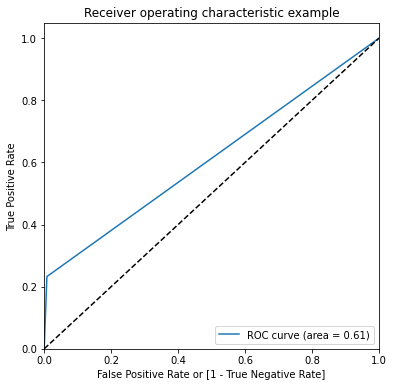

(array([0.        , 0.00806156, 1.        ]),
 array([0.        , 0.23255814, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [86]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [87]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.89'